# 전국 실업률 분포 변화
다음 데이터는 2000년부터 2022년까지 지역에 따른 실업률 데이터이다.

https://blog.hossam.kr/D01/unemployment_age.xlsx

이 데이터를 토대로 지역별 실업률 어떻게 변화하고 있는지 확인하라

## #01. 데이터 분석 준비

### 패키지 가져오기 

In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sb
import sys

### 데이터 가져오기

In [6]:
df = pd.read_excel("https://data.hossam.kr/D01/unemployment_age.xlsx", 
                index_col=[0, 1])
df

2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  \
시도별     연령계층별                                                                
서울특별시   15-29세   8.1   8.4   8.2   8.8   8.9   8.9   8.8   7.4   7.6   8.1   
        30-59세   3.9   3.6   3.0   3.2   3.4   3.6   3.4   3.2   3.0   3.7   
        60세이상    2.9   1.9   2.3   1.9   2.1   2.1   2.6   1.7   1.8   2.3   
부산광역시   15-29세  12.1  10.7   7.6   9.0   9.9   8.8   8.2   8.3   8.1   9.0   
        30-59세   5.5   4.2   2.9   2.9   3.1   3.3   3.2   3.0   2.9   3.5   
        60세이상    5.3   3.6   2.1   1.5   1.0   2.8   3.1   2.8   2.0   2.2   
대구광역시   15-29세   9.1   9.8   9.2   9.8   8.6   8.7   9.5   8.9   8.9   9.8   
        30-59세   3.7   3.5   2.8   3.0   3.2   3.2   2.5   2.4   2.6   3.3   
        60세이상    0.7   1.2   1.4   2.2   1.6   2.5   1.6   2.0   1.8   1.8   
인천광역시   15-29세   8.2   8.2   7.9   8.8   8.3   8.3   9.2   8.3   7.7   8.2   
        30-59세   4.6   3.6   2.8   3.1   3.4   3.5   3.1   3.0   3.1   3.6   
        60세이상    3.8   2.5   2.8   2.2   3.2   3.5   2.8   2.4   2.5   3.6   
광주광역시   15-29세  12.0   9.4   7.6  10.8   9.5   9.6  10.8  10.0   8.6   7.7   
        30-59세   4.7   3.7   2.8   2.8   2.9   3.1   2.6   2.5   2.7   2.8   
        60세이상    2.4   1.5   0.9   1.0   0.7   0.7   1.3   2.4   2.1   3.2   
대전광역시   15-29세   9.3   9.2   7.8   7.0   9.3   9.3   9.3   8.8   7.8   8.3   
        30-59세   3.3   3.0   2.6   2.9   2.7   3.1   3.2   2.9   2.7   2.5   
        60세이상    1.3   2.1   1.3   0.9   1.9   2.3   1.9   2.1   2.3   3.1   
울산광역시   15-29세   8.3   7.6   5.0   7.5   8.0   8.0   7.1   6.0   7.4   8.2   
        30-59세   3.0   2.2   1.7   2.0   2.5   2.2   1.9   1.8   2.5   3.1   
        60세이상    3.5   2.6   2.5   1.1   1.0   2.8   1.6   1.2   3.2   4.2   
세종특별자치시 15-29세   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
        30-59세   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
        60세이상    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
경기도     15-29세   6.2   5.8   4.9   7.3   7.6   7.5   6.9   6.5   6.5   8.4   
        30-59세   3.2   2.9   2.2   2.3   2.5   2.9   2.7   2.5   2.5   2.8   
        60세이상    2.7   1.9   1.7   1.7   2.5   2.0   2.5   2.7   1.7   2.7   
강원도     15-29세   5.7   4.5   4.8   5.9   6.4   4.9   3.8   6.4   4.6   6.2   
        30-59세   2.1   2.0   1.3   1.3   1.3   1.4   1.0   1.3   1.3   1.5   
        60세이상    0.5   0.5   0.2   0.5   0.2   0.1   0.2   0.1   0.7   0.9   
충청북도    15-29세   7.2   7.8   7.2   7.2   8.0   6.5   6.7   7.0   7.0   6.2   
        30-59세   3.0   2.5   1.5   2.5   1.7   1.6   1.5   1.5   1.5   1.5   
        60세이상    0.6   0.9   0.3   0.6   0.3   0.4   0.5   0.7   0.4   0.5   
충청남도    15-29세   7.2   8.7   6.9   7.6   6.6   7.5   6.1   5.7   6.3   8.1   
        30-59세   2.1   1.8   1.9   2.1   1.6   2.0   2.0   1.9   2.0   2.4   
        60세이상    0.4   0.3   0.6   0.7   0.5   0.5   0.6   0.7   0.6   1.0   
전라북도    15-29세   9.0   9.7   8.3   8.3   9.5   6.9  10.2   6.8   7.6   8.1   
        30-59세   2.0   1.9   1.5   1.8   1.7   2.1   1.6   2.0   1.7   1.3   
        60세이상    0.1   0.1   0.0   0.3   0.3   0.1   0.3   0.4   0.4   0.2   
전라남도    15-29세   8.9   8.1   7.3   7.5   8.1   7.3   5.8   5.8   6.9   5.3   
        30-59세   2.8   2.6   1.8   1.9   2.0   2.0   1.5   1.6   1.8   1.5   
        60세이상    0.4   0.5   0.2   0.1   0.3   0.3   0.2   0.3   0.4   0.4   
경상북도    15-29세   8.8   7.0   5.8   6.6   7.4   6.7   8.6   6.8   6.6   7.6   
        30-59세   2.4   2.0   1.7   1.5   1.9   1.8   1.3   1.4   1.5   2.3   
        60세이상    0.5   0.3   0.3   0.3   0.4   0.8   0.4   0.4   0.5   0.6   
경상남도    15-29세   5.9   6.4   6.0   5.8   5.9   6.4   6.3   6.4   5.7   7.0   
        30-59세   3.3   2.8   1.9   2.0   1.8   2.1   1.8   1.9   1.8   2.7   
        60세이상    0.5   0.7   0.3   0.6   0.7   0.6   0.8   0.8   0.4   0.8   
제주도     15-29세   5.5   5.1   5.5   4.9   6.4   6.0   5.1   5.3   3.9   4.0   
        30-59세   2.3   2.0   1.6   1.3

## #02. 데이터 전처리
### 1) 인덱스 해제 


In [7]:
df2 = df.reset_index()
df2.head()

,시도별,연령계층별,2000,2001,2002,2003,2004,2005,2006,2007,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,서울특별시,15-29세,8.1,8.4,8.2,8.8,8.9,8.9,8.8,7.4,...,8.7,10.4,9.3,10.3,10.1,10.1,8.8,9.1,9.0,6.8
1,서울특별시,30-59세,3.9,3.6,3.0,3.2,3.4,3.6,3.4,3.2,...,3.0,3.2,3.1,2.9,3.3,3.5,3.2,3.3,3.6,2.4
2,서울특별시,60세이상,2.9,1.9,2.3,1.9,2.1,2.1,2.6,1.7,...,2.5,2.8,3.2,2.8,3.6,4.0,4.3,4.7,5.1,3.6
3,부산광역시,15-29세,12.1,10.7,7.6,9.0,9.9,8.8,8.2,8.3,...,8.8,9.0,9.7,9.9,11.5,9.5,9.1,10.6,7.7,6.8
4,부산광역시,30-59세,5.5,4.2,2.9,2.9,3.1,3.3,3.2,3.0,...,3.0,3.0,3.1,2.8,3.2,3.2,2.4,2.9,2.4,2.2


In [11]:
df3 = pd.melt(df2,id_vars=['시도별','연령계층별'],var_name="년도",value_name="실업률")
df3

,시도별,연령계층별,년도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5
...,...,...,...,...
1168,경상남도,30-59세,2022,2.8
1169,경상남도,60세이상,2022,3.0
1170,제주도,15-29세,2022,5.1
1171,제주도,30-59세,2022,1.6


## #03. 시각화
### 그래프 준비하기 

In [12]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (24, 8)
plt.rcParams["axes.unicode_minus"] = False

### 년도에 따른 전국 평균 실업률 변화(전체연령)

In [17]:
tdf = df3.groupby("년도")['실업률'].mean()
tdf= pd.DataFrame(tdf)
tdf

,실업률
년도,
2000,4.103922
2001,3.762745
2002,3.154902
2003,3.437255
2004,3.582353
2005,3.584314
2006,3.488235
2007,3.343137
2008,3.282353


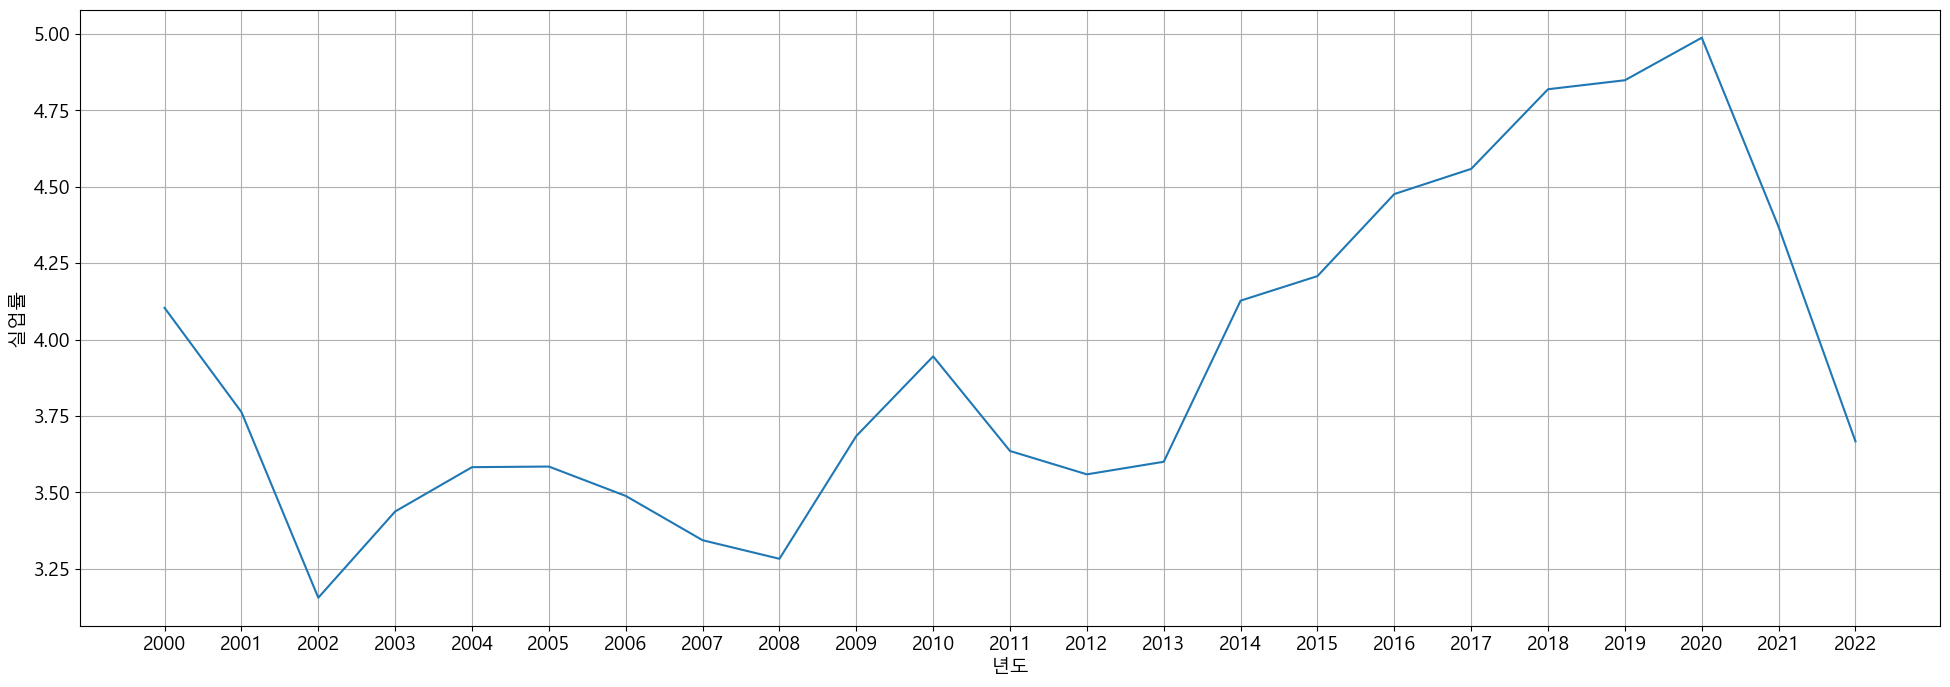

In [18]:
plt.figure()
sb.lineplot(data=tdf, x='년도', y='실업률')
plt.grid()
plt.show()
plt.close()

### 연도에 따른 전국 평균 실업률 변화( 연령대별)


In [19]:
df3

,시도별,연령계층별,년도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5
...,...,...,...,...
1168,경상남도,30-59세,2022,2.8
1169,경상남도,60세이상,2022,3.0
1170,제주도,15-29세,2022,5.1
1171,제주도,30-59세,2022,1.6


In [25]:
tdf2 = df3.groupby(['년도','연령계층별'],as_index=False)['실업률'].mean()

tdf2

,년도,연령계층별,실업률
0,2000,15-29세,7.735294
1,2000,30-59세,3.052941
2,2000,60세이상,1.523529
3,2001,15-29세,7.435294
4,2001,30-59세,2.605882
...,...,...,...
64,2021,30-59세,2.364706
65,2021,60세이상,3.570588
66,2022,15-29세,6.205882
67,2022,30-59세,1.982353


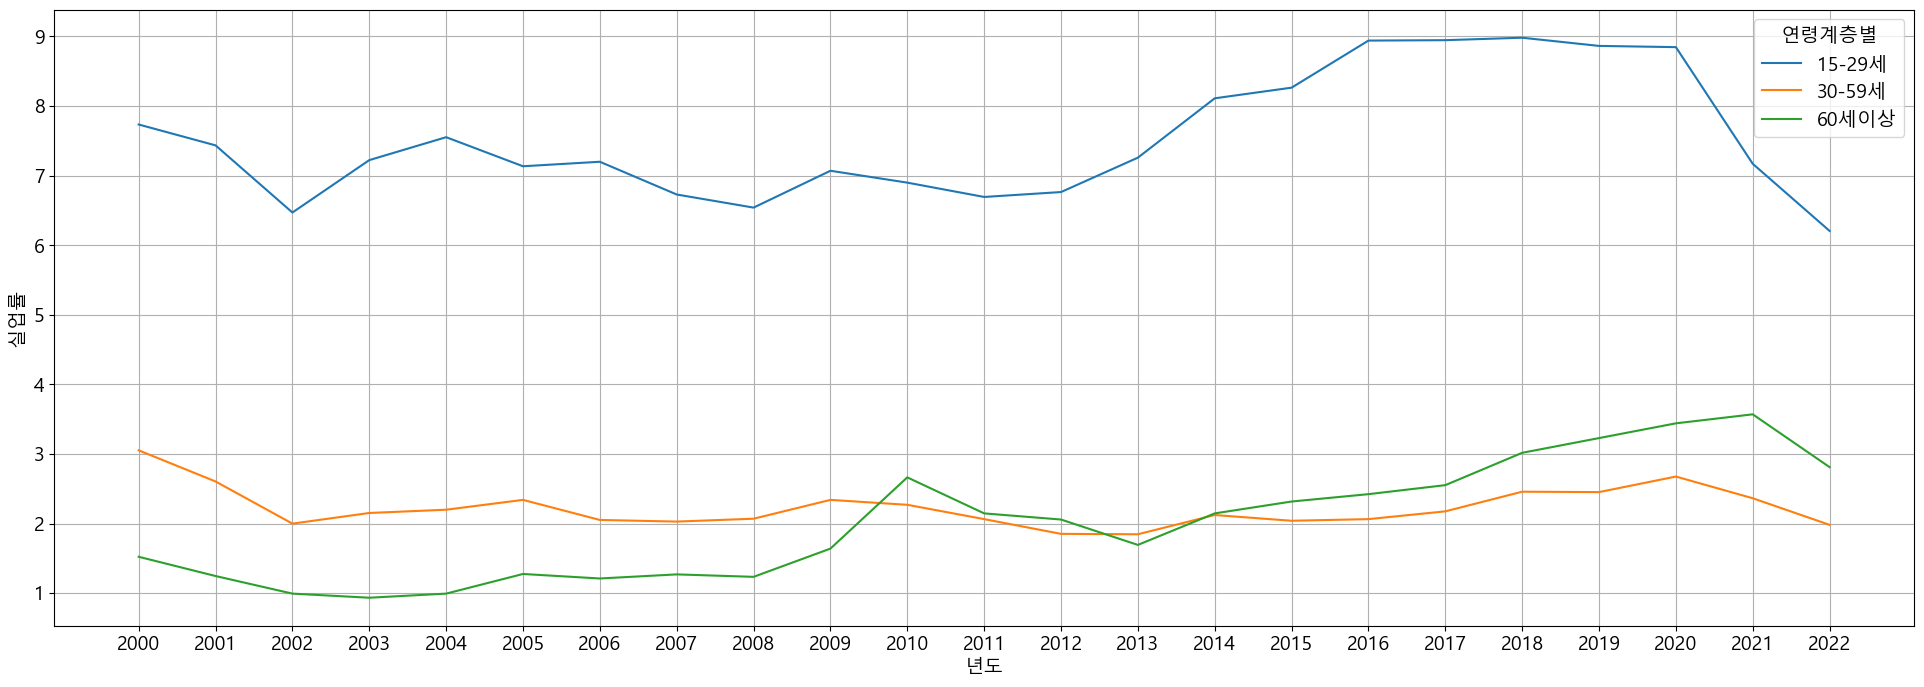

In [28]:
plt.figure()
sb.lineplot(data = tdf2, x='년도',y='실업률',hue='연령계층별')
plt.grid()
plt.show()
plt.close()


### 지역별 서브 플롯

In [32]:
area = df3['시도별'].unique()
area
for i in area:
    print(i)

서울특별시
부산광역시
대구광역시
인천광역시
광주광역시
대전광역시
울산광역시
세종특별자치시
경기도
강원도
충청북도
충청남도
전라북도
전라남도
경상북도
경상남도
제주도


In [33]:
df3

,시도별,연령계층별,년도,실업률
0,서울특별시,15-29세,2000,8.1
1,서울특별시,30-59세,2000,3.9
2,서울특별시,60세이상,2000,2.9
3,부산광역시,15-29세,2000,12.1
4,부산광역시,30-59세,2000,5.5
...,...,...,...,...
1168,경상남도,30-59세,2022,2.8
1169,경상남도,60세이상,2022,3.0
1170,제주도,15-29세,2022,5.1
1171,제주도,30-59세,2022,1.6


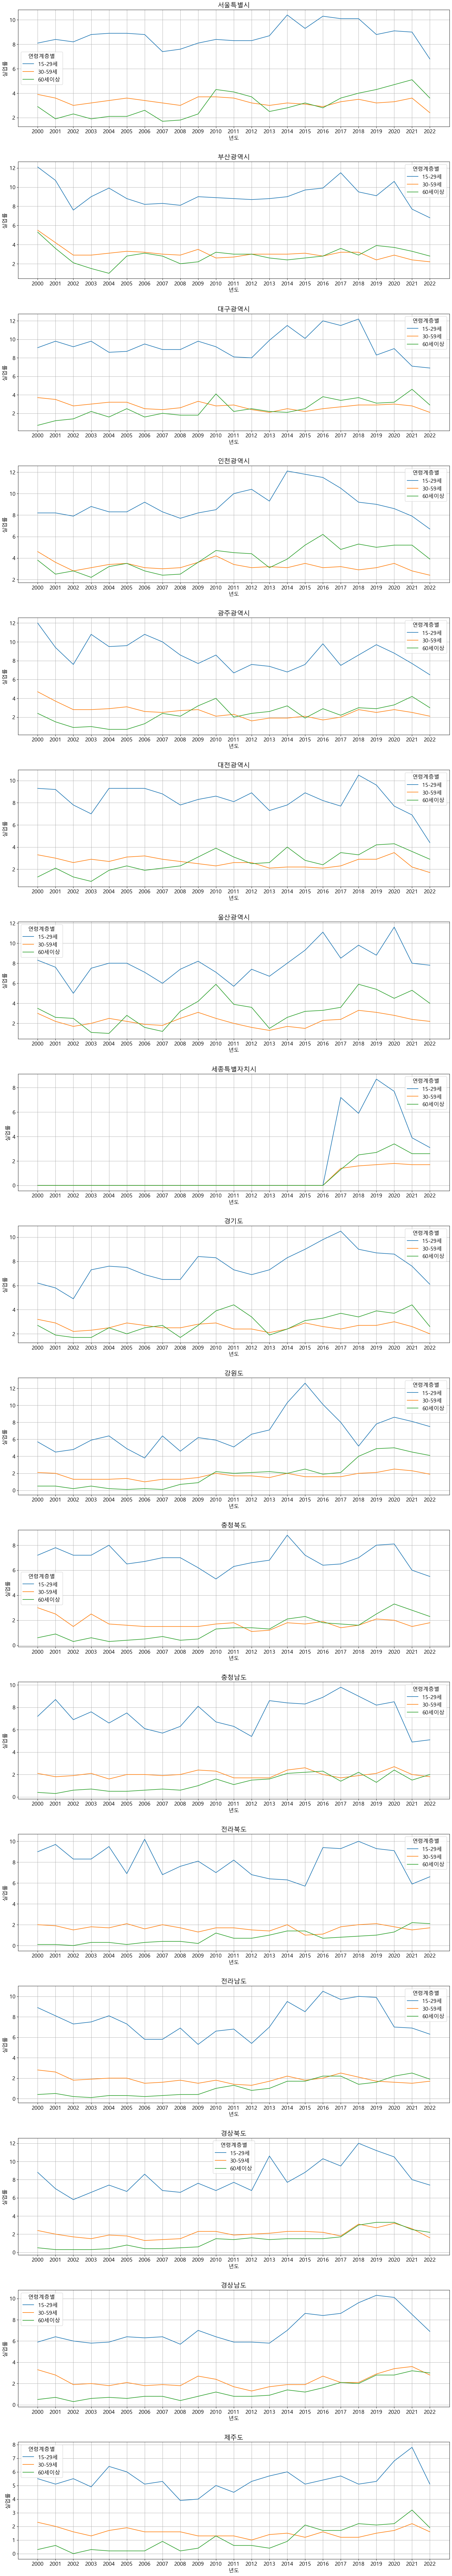

In [34]:
size = len(area)

fig, ax = plt.subplots(size,1,figsize = (20,7*size))
fig.subplots_adjust(hspace=0.3)

for i, v in enumerate(area):
    tdf = df3.query("시도별 == @v")
    sb.lineplot(data=tdf, x='년도', y='실업률', hue='연령계층별', ax=ax[i])
    ax[i].grid()
    ax[i].title.set_text(v)
plt.show()
plt.close()

In [35]:
len(area)

17

### 2열 서브플롯

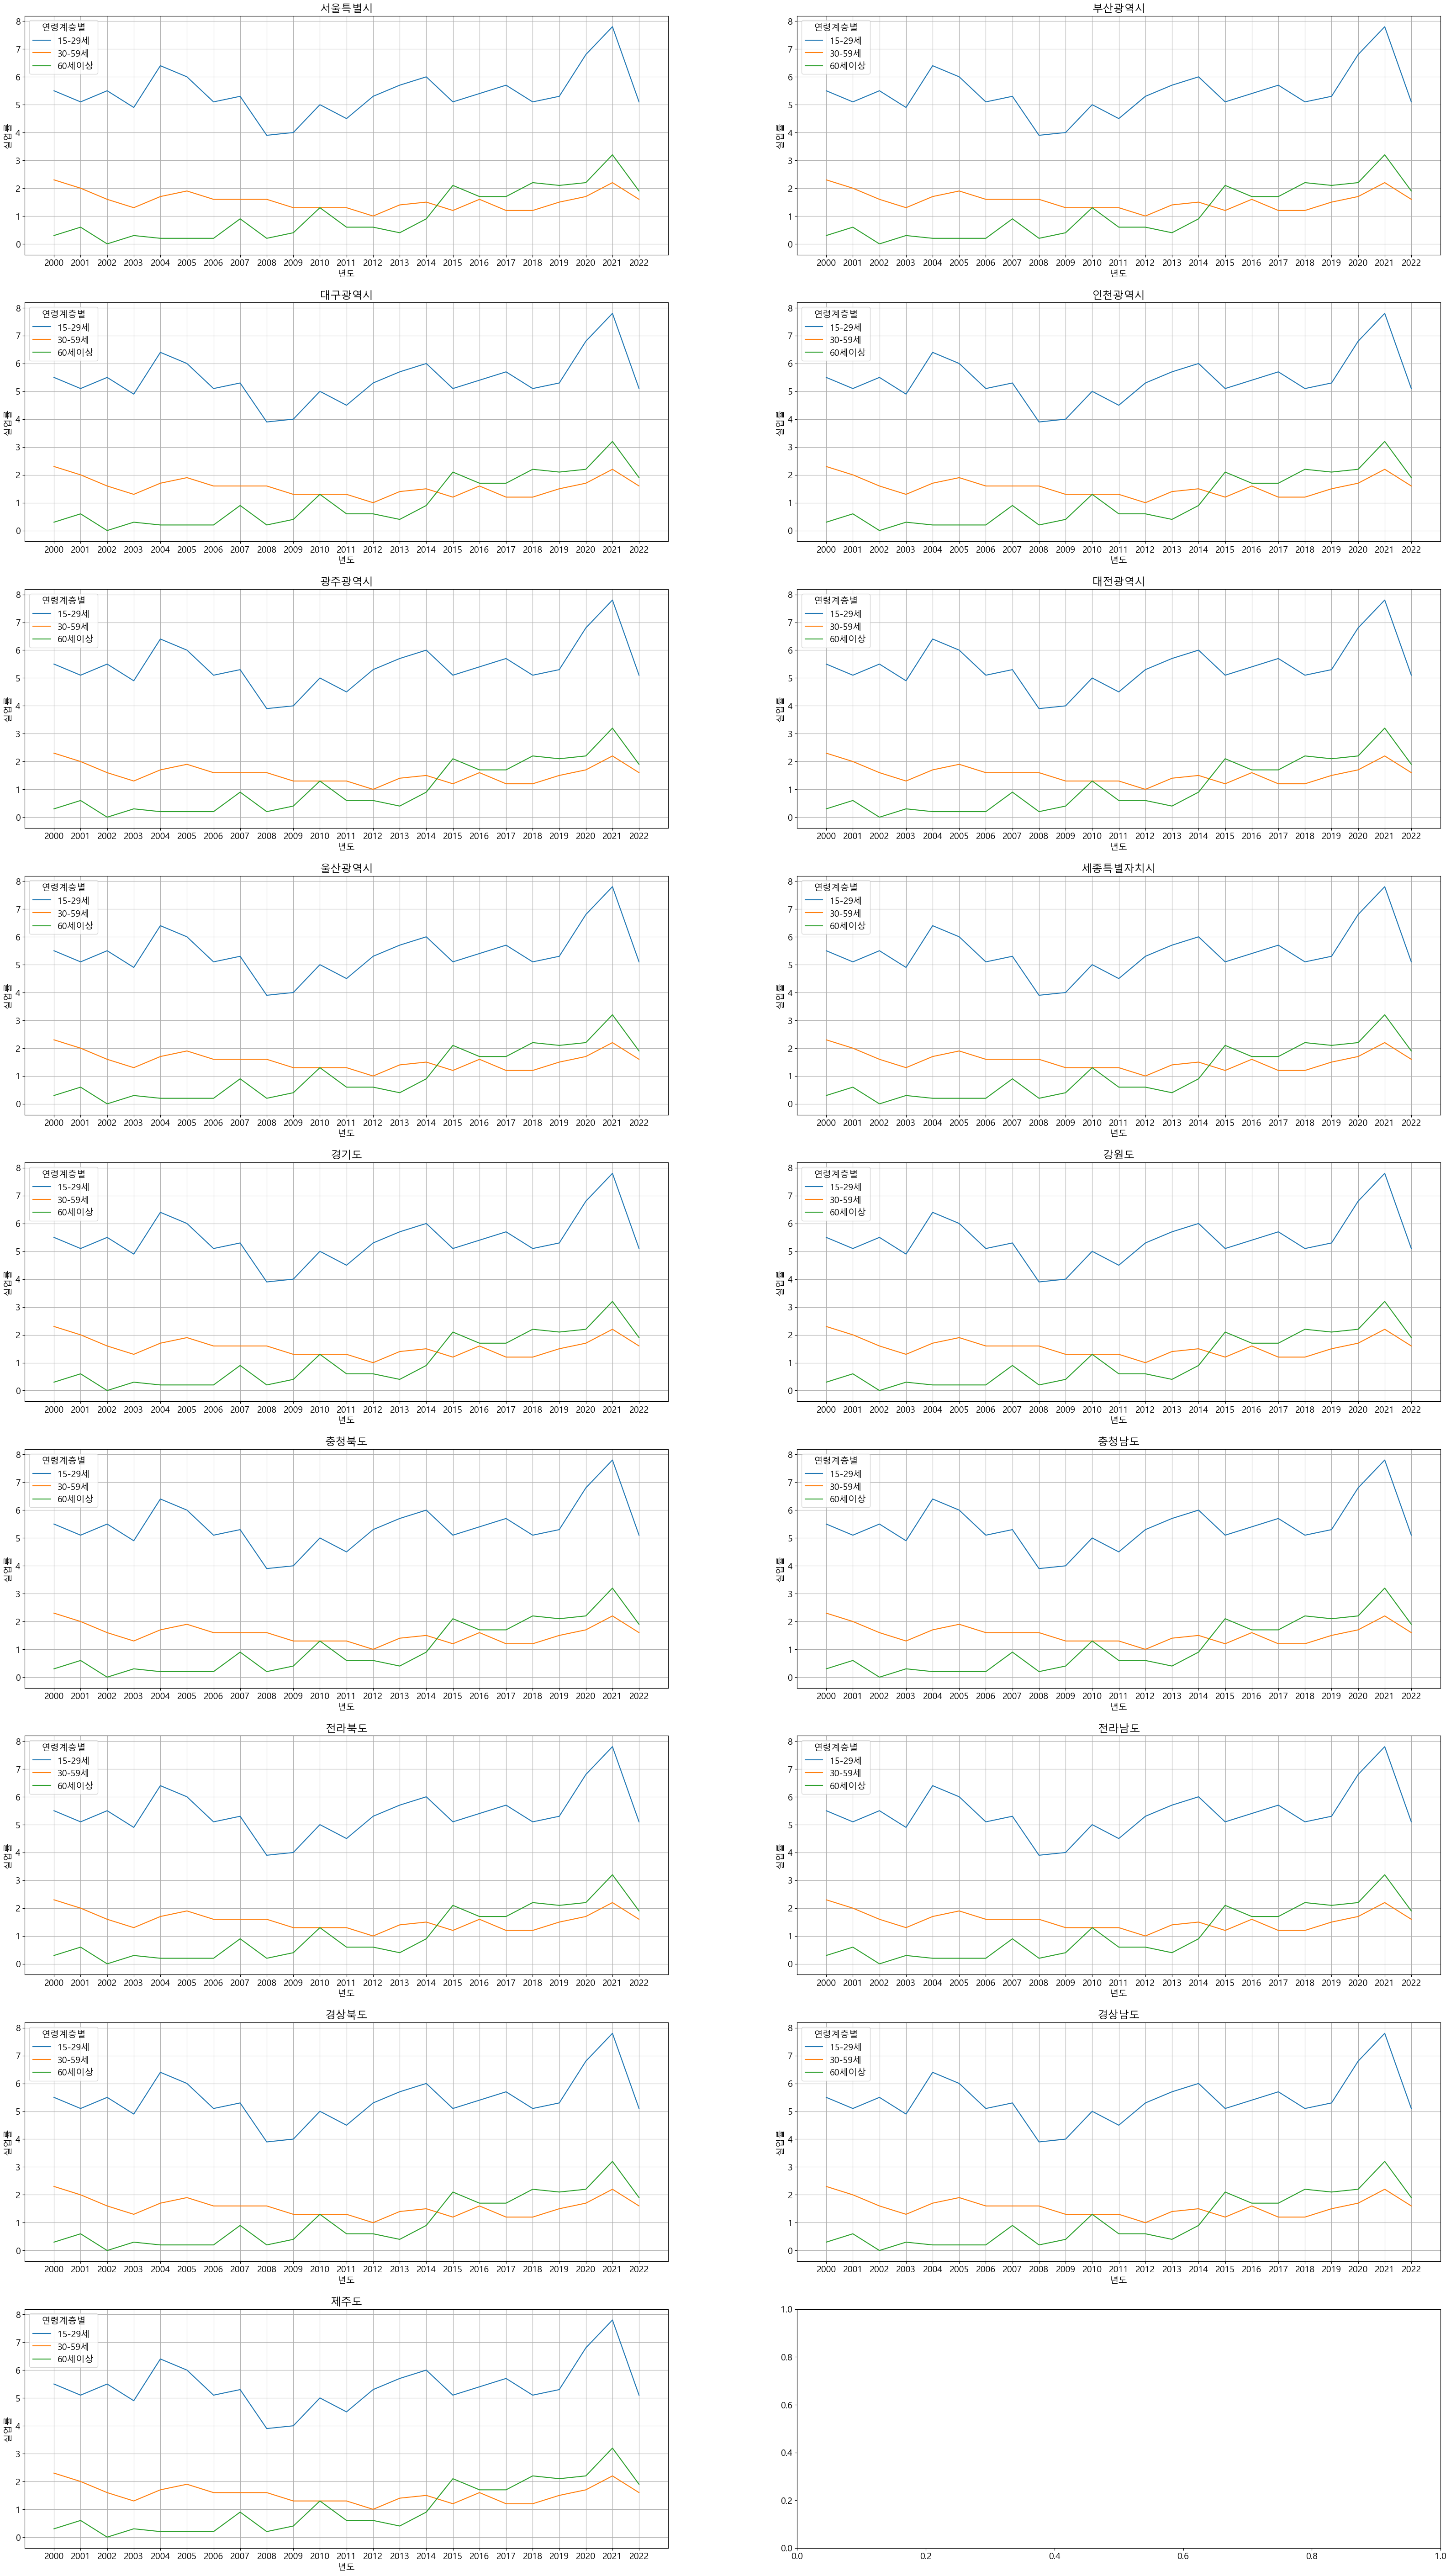

In [36]:
size=len(area)
rows = int((size/2)+0.5)

fig,ax = plt.subplots(rows,2,figsize=(40,8*rows))
x= 0 
for i in range(0,rows):
    for j in range(0,2):
        if x>=size : 
            break
        key = area[x]
        x+=1
        tdf = df3.query("시도별 == @v")
        sb.lineplot(data=tdf, x='년도', y='실업률', hue='연령계층별', ax=ax[i][j])
        ax[i][j].grid()
        ax[i][j].title.set_text(key)

plt.show()
plt.close()